In [13]:

import os
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)
from diffrax import diffeqsolve, ODETerm, Dopri5, SaveAt
import jax
import jax.numpy as jnp

import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.style.use("seaborn")

gpu


In [18]:
seed = 6969
rng = jax.random.PRNGKey(seed)

In [24]:
def generate_params(rng_key): 
    N = 10 
    lmin, lmax= 1, 3
    A = jax.random.uniform(rng_key, shape=(1, N), dtype=jnp.float32)
    phi = 2.*jnp.pi*jax.random.uniform(rng_key, shape=(1, N), dtype=jnp.float32)
    l = jax.random.randint(rng_key, (1, N), lmin, lmax)

    return N, A, phi, l

def initial_conditions(x : jnp.array, L: int, rng_key, params=None): 
    if params is None: 
        keytemp, subkeytemp = jax.random.split(rng_key)
        params = generate_params(keytemp) 

    N, A, phi, l = params 

    return jnp.sum(A *jnp.sin((2*jnp.pi*l*x[:, None] / L) + phi), -1)

In [27]:
generate_params(rng), generate_params(rng)


((10,
  Array([[0.29828787, 0.7713944 , 0.15722048, 0.15420413, 0.32275236,
          0.72034323, 0.68797064, 0.01345813, 0.8728852 , 0.7829535 ]],      dtype=float32),
  Array([[1.874198  , 4.846814  , 0.9878455 , 0.9688932 , 2.0279129 ,
          4.52605   , 4.322647  , 0.08455995, 5.4845    , 4.919442  ]],      dtype=float32),
  Array([[2, 2, 1, 1, 2, 2, 2, 1, 2, 1]], dtype=int32)),
 (10,
  Array([[0.29828787, 0.7713944 , 0.15722048, 0.15420413, 0.32275236,
          0.72034323, 0.68797064, 0.01345813, 0.8728852 , 0.7829535 ]],      dtype=float32),
  Array([[1.874198  , 4.846814  , 0.9878455 , 0.9688932 , 2.0279129 ,
          4.52605   , 4.322647  , 0.08455995, 5.4845    , 4.919442  ]],      dtype=float32),
  Array([[2, 2, 1, 1, 2, 2, 2, 1, 2, 1]], dtype=int32)))

In [10]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from diffrax import diffeqsolve, ODETerm, SaveAt, Tsit5


def vector_field(t, y, args):
    prey, predator = y
    α, β, γ, δ = args
    d_prey = α * prey - β * prey * predator
    d_predator = -γ * predator + δ * prey * predator
    d_y = d_prey, d_predator
    return d_y


term = ODETerm(vector_field)
solver = Tsit5()
t0 = 0
t1 = 140
dt0 = 0.1
y0 = (10.0, 10.0)
args = (0.1, 0.02, 0.4, 0.02)
saveat = SaveAt(ts=jnp.linspace(t0, t1, 1000))
sol = diffeqsolve(term, solver, t0, t1, dt0, y0, args=args, saveat=saveat)


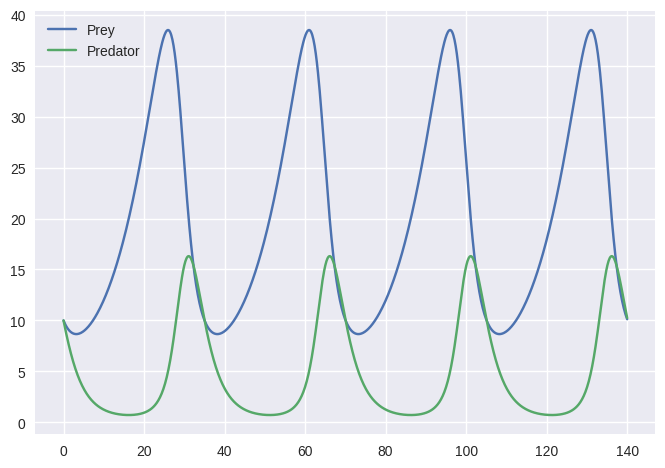

In [11]:
plt.plot(sol.ts, sol.ys[0], label="Prey")
plt.plot(sol.ts, sol.ys[1], label="Predator")
plt.legend()
plt.show()
